In [1]:
import pandas as pd
import re
import seaborn as sns

In [2]:
from datetime import datetime

In [3]:
df=pd.read_csv("datauncleaned.csv")
df.head()

,Unnamed: 0,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,0,ProductId: B001E4KFG0,UserId: A3SGXH7AUHU8GW,ProfileName: delmartian,HelpfulnessNumerator: 1,HelpfulnessDenominator: 1,Score: 5,Time: 1303862400,ReviewSummary: Good Quality Dog Food,ReviewText: I have bought several of the Vital...
1,1,ProductId: B00171APVA,UserId: A21BT40VZCCYT4,ProfileName: Carol A. Reed,HelpfulnessNumerator: 0,HelpfulnessDenominator: 0,Score: 5,Time: 1351209600,ReviewSummary: Healthy Dog Food,ReviewText: This is a very healthy dog food. G...
2,2,ProductId: B0019CW0HE,UserId: A2P6ACFZ8FTNVV,ProfileName: Melissa Benjamin,HelpfulnessNumerator: 0,HelpfulnessDenominator: 1,Score: 1,Time: 1331164800,ReviewSummary: Bad,ReviewText: I fed this to my Golden Retriever ...
3,3,ProductId: B006F2NYI2,UserId: A132DJVI37RB4X,ProfileName: Scottdrum,HelpfulnessNumerator: 2,HelpfulnessDenominator: 5,Score: 2,Time: 1332374400,"ReviewSummary: Not hot, not habanero","ReviewText: I have to admit, I was a sucker fo..."
4,4,ProductId: B000P41A28,UserId: A82WIMR4RSVLI,ProfileName: Emrose mom,HelpfulnessNumerator: 0,HelpfulnessDenominator: 1,Score: 4,Time: 1337472000,ReviewSummary: The best weve tried so far,ReviewText: We have a 7 week old... He had gas...


In [4]:
del df['Unnamed: 0']

In [5]:
lst=['ProductId',
'UserId',
'ProfileName',
'HelpfulnessNumerator',
'HelpfulnessDenominator',
'Score',
'Time',
'ReviewSummary',
'ReviewText']

In [6]:
for i in lst:
    df[i].replace(to_replace= i+":", value='', regex=True,inplace= True)    
    

In [7]:
df.to_csv('datalittlecleaned.csv')

In [8]:
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for the...
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hate...
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large..."
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and consti...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568454 non-null  object
 1   UserId                  568454 non-null  object
 2   ProfileName             568454 non-null  object
 3   HelpfulnessNumerator    568454 non-null  object
 4   HelpfulnessDenominator  568454 non-null  object
 5   Score                   568454 non-null  object
 6   Time                    568454 non-null  object
 7   ReviewSummary           568454 non-null  object
 8   ReviewText              568454 non-null  object
dtypes: object(9)
memory usage: 39.0+ MB


In [10]:
df['Score']=pd.to_numeric(df['Score'], errors='coerce')
df['HelpfulnessNumerator']=pd.to_numeric(df['HelpfulnessNumerator'], errors='coerce')
df['HelpfulnessDenominator']=pd.to_numeric(df['HelpfulnessDenominator'], errors='coerce')
df['Time']=pd.to_numeric(df['Time'], errors='coerce')


In [11]:
df.dtypes

ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
ReviewSummary             object
ReviewText                object
dtype: object

In [12]:
data=pd.read_csv('reviews.csv')

In [13]:
data.head()

,Unnamed: 0.1,Unnamed: 0,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,0,0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...
1,1,1,B00171APVA,A21BT40VZCCYT4,Carol A Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food Good for thei...
2,2,2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hate...
3,3,3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,Not hot not habanero,I have to admit I was a sucker for the large ...
4,4,4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old He had gas and constipat...


In [14]:
del data['Unnamed: 0']
del data['Unnamed: 0.1']

In [15]:
data.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...
1,B00171APVA,A21BT40VZCCYT4,Carol A Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food Good for thei...
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hate...
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,Not hot not habanero,I have to admit I was a sucker for the large ...
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old He had gas and constipat...


In [16]:
data['Time'] = data['Time'].apply(lambda timestamp: datetime.fromtimestamp(timestamp))

In [17]:
data['Time'].max()

Timestamp('2012-10-26 05:30:00')

In [18]:
data['Time'].min()

Timestamp('1999-10-08 05:30:00')

In [19]:
data.dtypes

ProductId                         object
UserId                            object
ProfileName                       object
HelpfulnessNumerator               int64
HelpfulnessDenominator             int64
Score                              int64
Time                      datetime64[ns]
ReviewSummary                     object
ReviewText                        object
dtype: object

In [20]:
data.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27 05:30:00,Good Quality Dog Food,I have bought several of the Vitality canned ...
1,B00171APVA,A21BT40VZCCYT4,Carol A Reed,0,0,5,2012-10-26 05:30:00,Healthy Dog Food,This is a very healthy dog food Good for thei...
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,2012-03-08 05:30:00,Bad,I fed this to my Golden Retriever and he hate...
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,2012-03-22 05:30:00,Not hot not habanero,I have to admit I was a sucker for the large ...
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,2012-05-20 05:30:00,The best weve tried so far,We have a 7 week old He had gas and constipat...


In [21]:
#data['Helpfulness']=(data['HelpfulnessNumerator']/data['HelpfulnessDenominator'])

In [22]:
#data1=data['Helpfulness']

<AxesSubplot:xlabel='Score'>

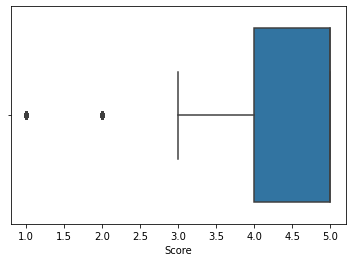

In [23]:
sns.boxplot(x=data["Score"])

In [24]:
data.duplicated().sum()

294

In [25]:
data.drop_duplicates(inplace = True)

In [26]:
data.isnull().sum()

ProductId                   0
UserId                      0
ProfileName               462
HelpfulnessNumerator        0
HelpfulnessDenominator      0
Score                       0
Time                        0
ReviewSummary             263
ReviewText                  1
dtype: int64

In [27]:
data.dropna(inplace=True)

In [28]:
data.isnull().sum()

ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
ReviewSummary             0
ReviewText                0
dtype: int64

In [29]:
data.dropna(subset=['Time'], inplace = True)

In [30]:
data.to_csv('datafinalcleaned.csv')